In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import numpy as np

According to CMS, TImely and effective care consist of 9 categories. Out of 9, use of Medical Imaging is present in different file.
NOTE: This csv file doesnot consist of "Compare to National Benchmark"


In [8]:
Care_1 =pd.read_csv("Timely and Effective Care - Hospital2020.csv")
Care_2 =pd.read_csv("Timely_and_Effective_Care-Hospital2021.csv")
Care_3 =pd.read_csv("Timely_and_Effective_Care-Hospital2022.csv")
Care_4 =pd.read_csv("Timely_and_Effective_Care-Hospital2023.csv")
Care_5 =pd.read_csv("Timely_and_Effective_Care-Hospital2024.csv")

Care_df =pd.concat([Care_1, Care_2, Care_3, Care_4, Care_5], ignore_index=True)

/var/folders/rq/8sjqg4hj3k99cfwf49v9_dlc0000gn/T/ipykernel_38951/633133397.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Care_5 =pd.read_csv("Timely_and_Effective_Care-Hospital2024.csv")


In [10]:
Care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467037 entries, 0 to 467036
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Facility ID       467037 non-null  object
 1   Facility Name     467037 non-null  object
 2   Address           467037 non-null  object
 3   City              245956 non-null  object
 4   State             467037 non-null  object
 5   ZIP Code          467037 non-null  int64 
 6   County Name       245956 non-null  object
 7   Phone Number      245956 non-null  object
 8   Condition         467037 non-null  object
 9   Measure ID        467037 non-null  object
 10  Measure Name      467037 non-null  object
 11  Score             467036 non-null  object
 12  Sample            443493 non-null  object
 13  Footnote          294895 non-null  object
 14  Start Date        467037 non-null  object
 15  End Date          467037 non-null  object
 16  City/Town         221081 non-null  obj

In [12]:

# Convert 'Facility ID' to numeric (invalid entries become NaN)
Care_df['Facility ID'] = pd.to_numeric(Care_df['Facility ID'], errors='coerce').astype('Int64')


# Convert 'Score' to numeric (e.g., float), handling bad values
Care_df['Score'] = pd.to_numeric(Care_df['Score'], errors='coerce')

  

In [14]:
# Hospital list for filtering
hospital_ids = [230017, 230020, 230038, 230058, 230081, 230097, 230110, 230156,
                230222, 231320, 233300, 230059, 231322]

# Target measures for filtering
target_measures = ["Percentage of healthcare personnel who completed COVID-19 primary vaccination series",
                   "Healthcare workers given influenza vaccination", 
                   "Average (median) time patients spent in the emergency department before leaving from the visit A lower number of minutes is better",
                   "Appropriate care for severe sepsis and septic shock", 
                   "Improvement in Patient's Visual Function within 90 Days Following Cataract Surgery", 
                   "Endoscopy/polyp surveillance: appropriate follow-up interval for normal colonoscopy in average risk patients", 
                   "Safe Use of Opioids - Concurrent Prescribing", "Anticoagulation Therapy for Atrial Fibrillation/Flutter", 
                   "Venous Thromboembolism Prophylaxis"]



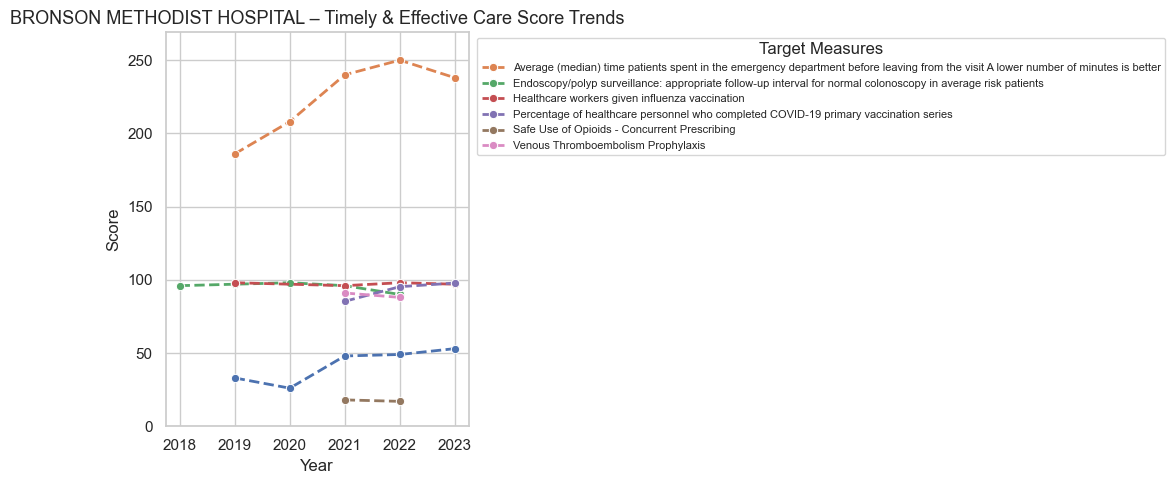

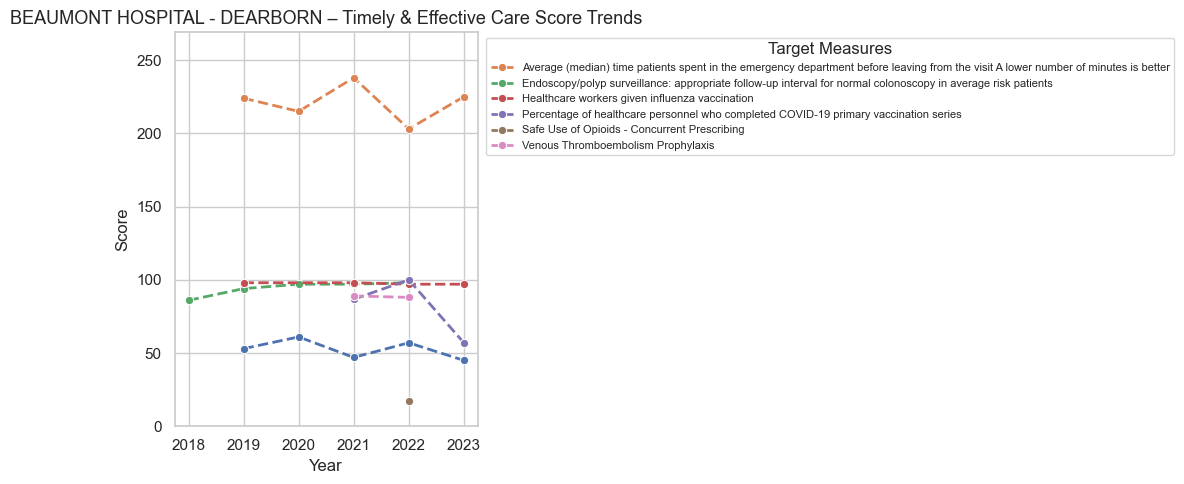

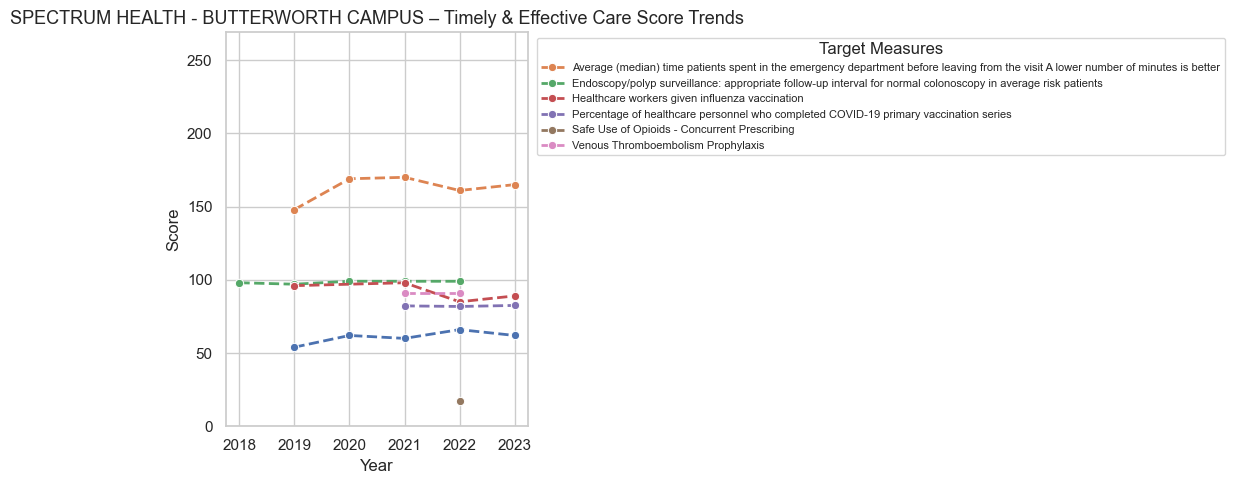

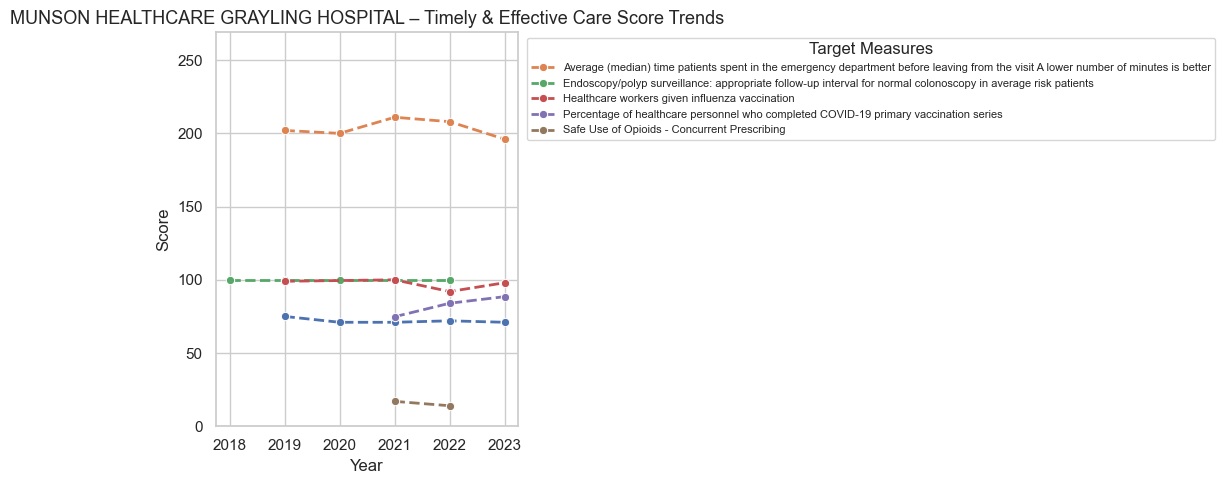

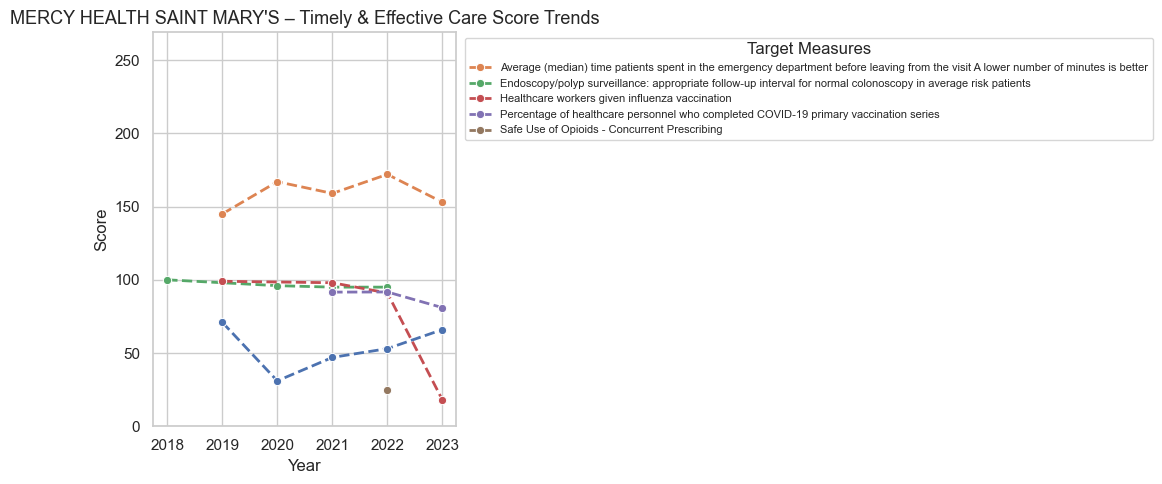

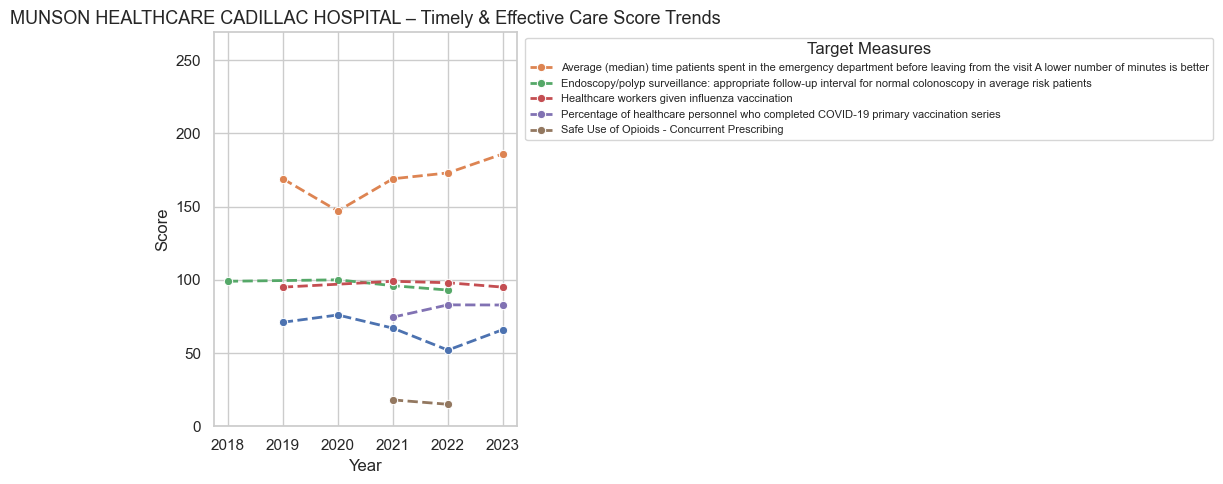

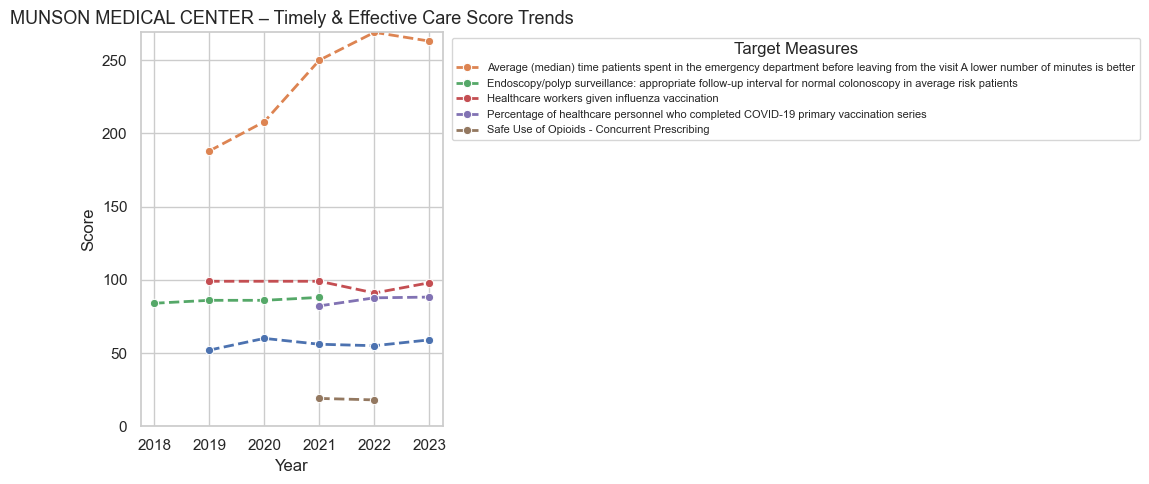

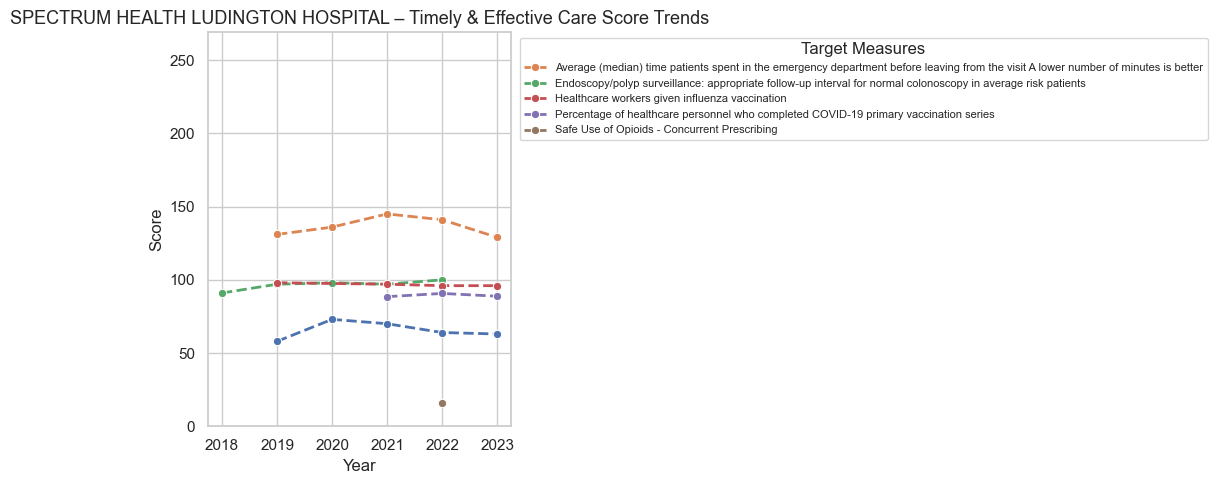

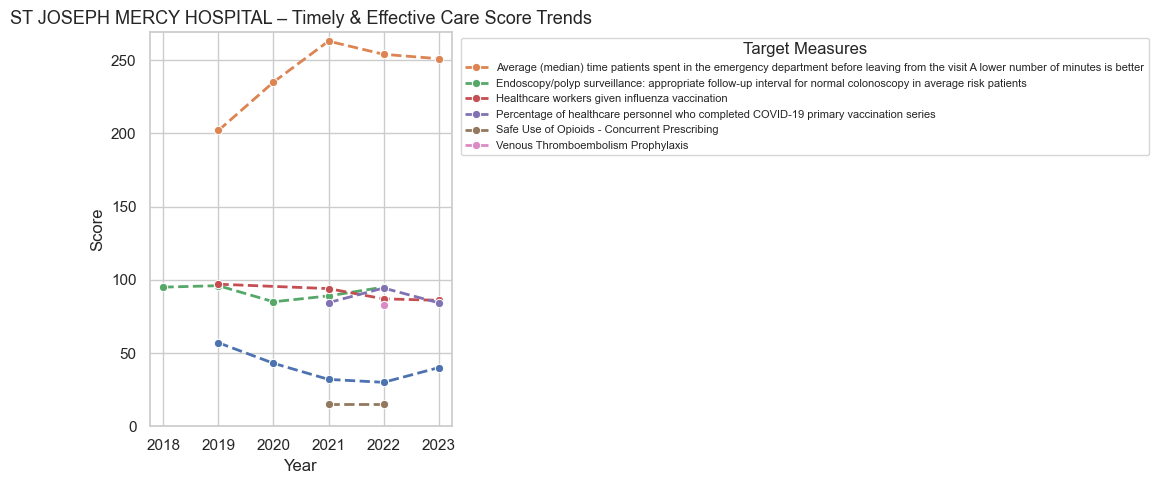

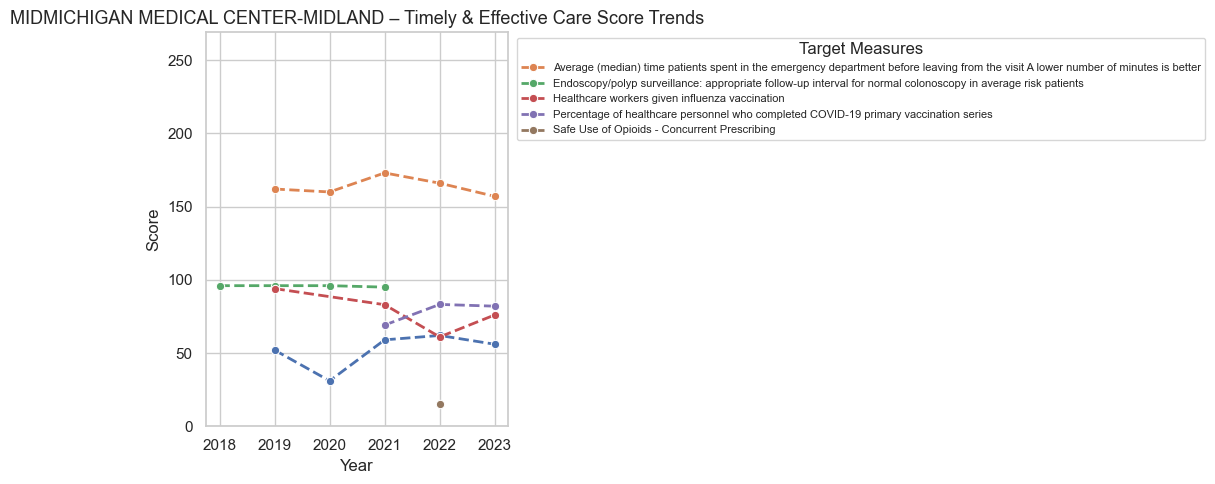

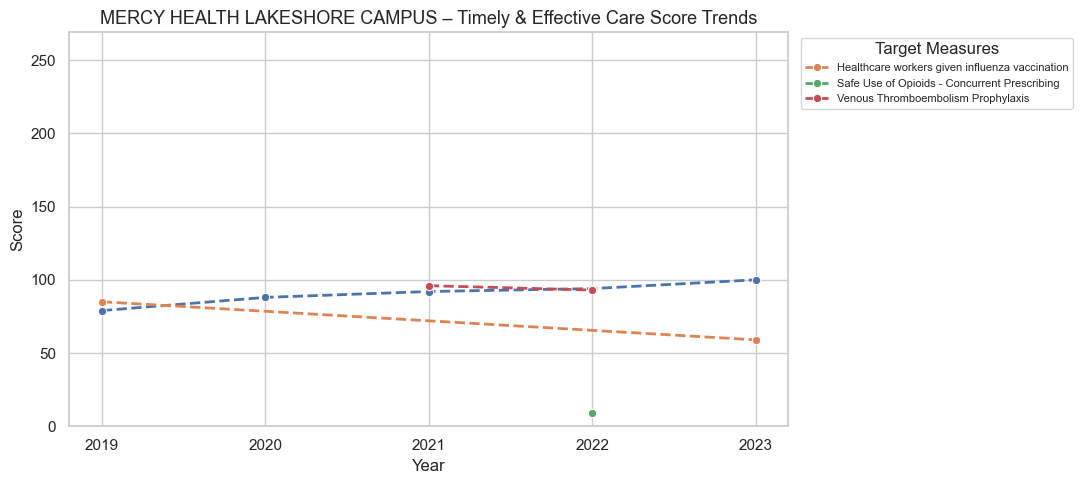

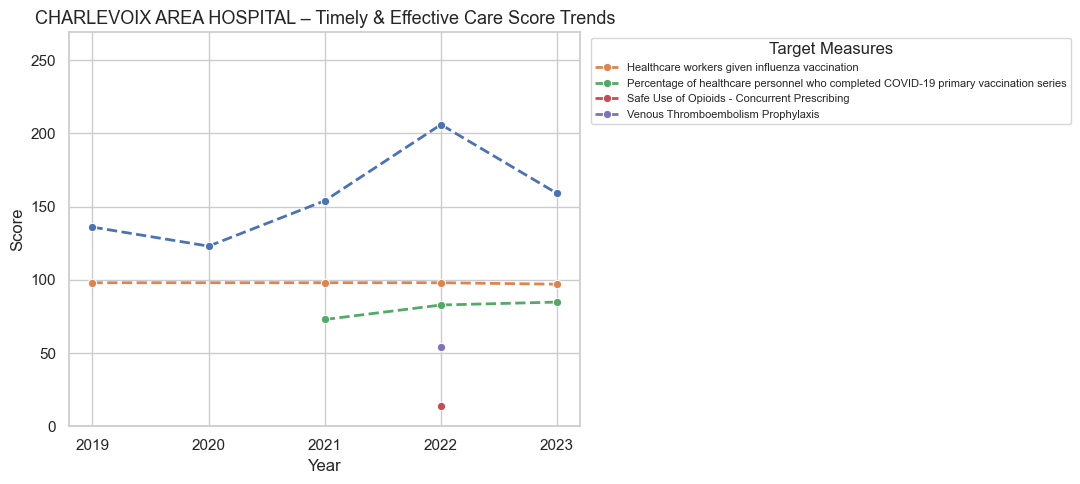

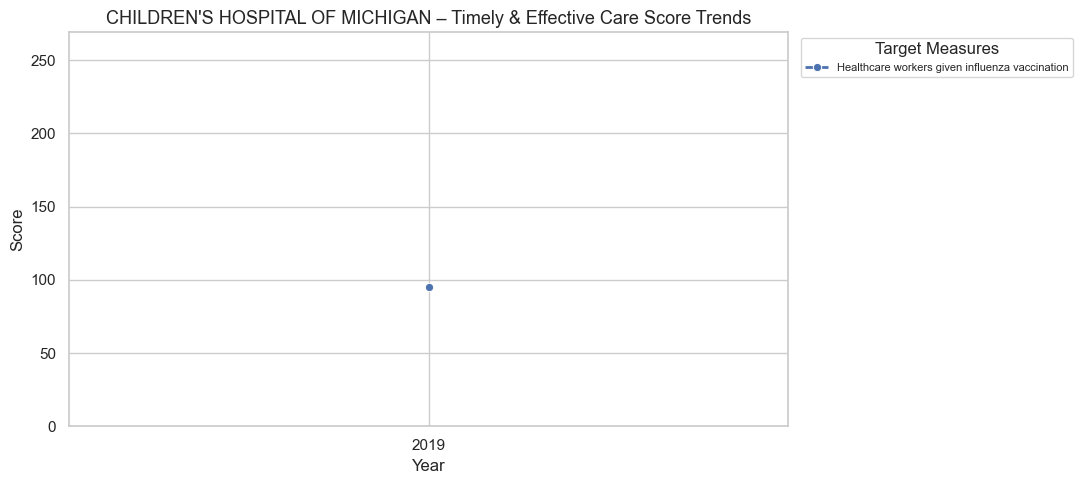

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Filter Relevant Data ---
Care_df = Care_df[Care_df['Facility ID'].isin(hospital_ids)]
Care_df = Care_df[Care_df['Measure Name'].isin(target_measures)].copy()

# Extract Year
Care_df['Year'] = pd.to_datetime(Care_df['End Date'], errors='coerce').dt.year
Care_df = Care_df.dropna(subset=['Score', 'Year'])

# Create lookup dictionary from Facility ID → 2024 Hospital Name
id_to_name = Care_df.dropna(subset=["Facility Name"]).drop_duplicates("Facility ID")[['Facility ID', 'Facility Name']].set_index("Facility ID")["Facility Name"].to_dict()

# Global Y-axis range
global_ymin = 0
global_ymax = max(2.0, Care_df['Score'].max())

sns.set(style="whitegrid")

# --- Plotting by Facility ID ---
for fid in Care_df['Facility ID'].dropna().unique():
    plt.figure(figsize=(11, 5))
    data = Care_df[Care_df['Facility ID'] == fid].sort_values(['Measure Name', 'Year'])
    
    # Get hospital name from 2024
    hospital_name = id_to_name.get(fid, f"Hospital ID {fid}")

    # Plot lines by measure name
    lineplot = sns.lineplot(
        data=data,
        x="Year",
        y="Score",
        hue="Measure Name",
        marker="o",
        linewidth=2,
        linestyle='--'
    )

    # Chart formatting
    plt.title(f"{hospital_name} – Timely & Effective Care Score Trends", fontsize=13)
    plt.ylabel("Score")
    plt.xlabel("Year")
    plt.ylim(global_ymin, global_ymax)
    plt.xticks(sorted(data["Year"].unique()))

    # Target measure legend
    handles, labels = lineplot.get_legend_handles_labels()
    plt.legend(handles=handles[1:], labels=labels[1:],  # skip hue label
               title="Target Measures", bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)

    plt.tight_layout()
    safe_name = f"{fid}_{hospital_name}".replace(" ", "_").replace("/", "_")
    plt.savefig(f"{safe_name}_Timely_Effective_Care.png", dpi=300, bbox_inches='tight')
    plt.show()


/var/folders/rq/8sjqg4hj3k99cfwf49v9_dlc0000gn/T/ipykernel_38951/4011069413.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Care_5 = pd.read_csv("Timely_and_Effective_Care-Hospital2024.csv")


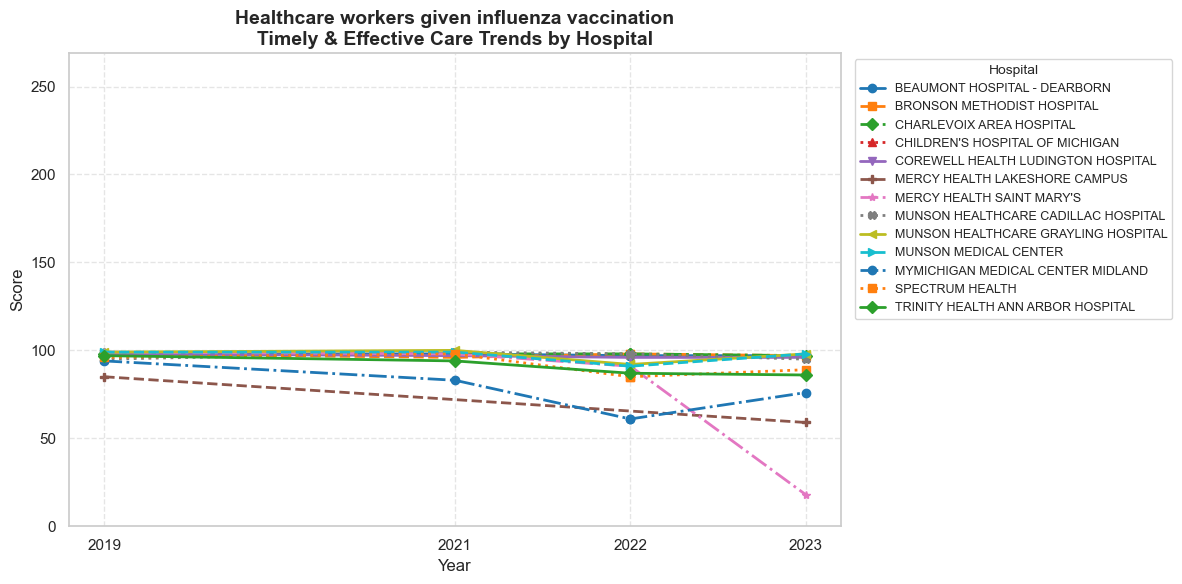

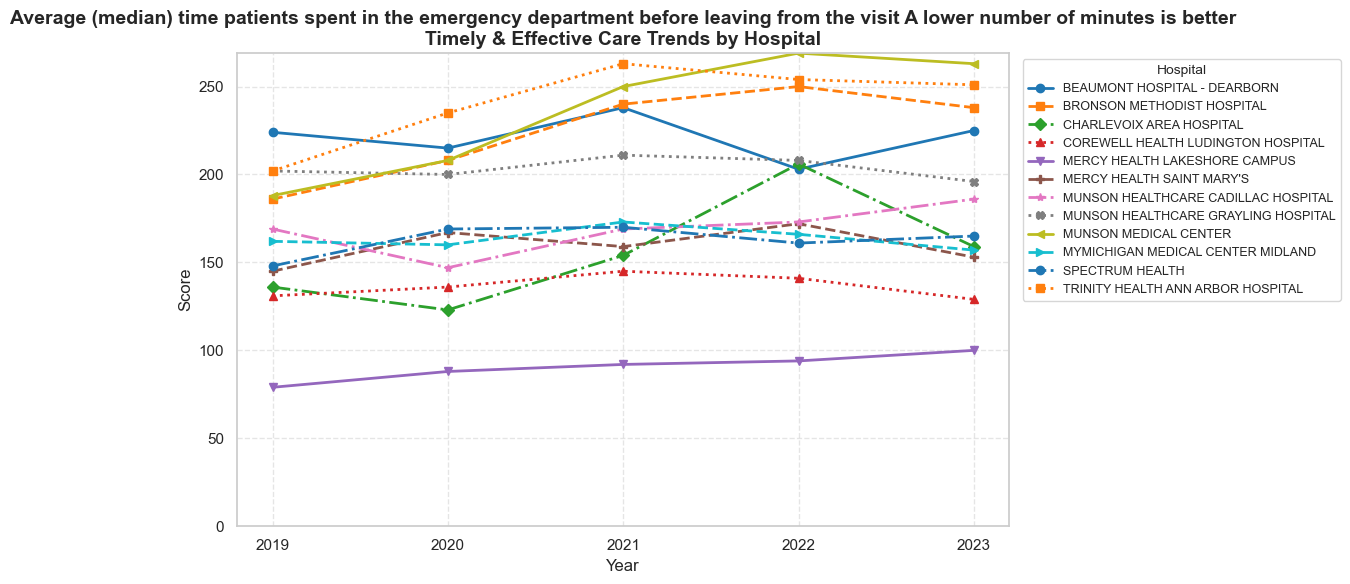

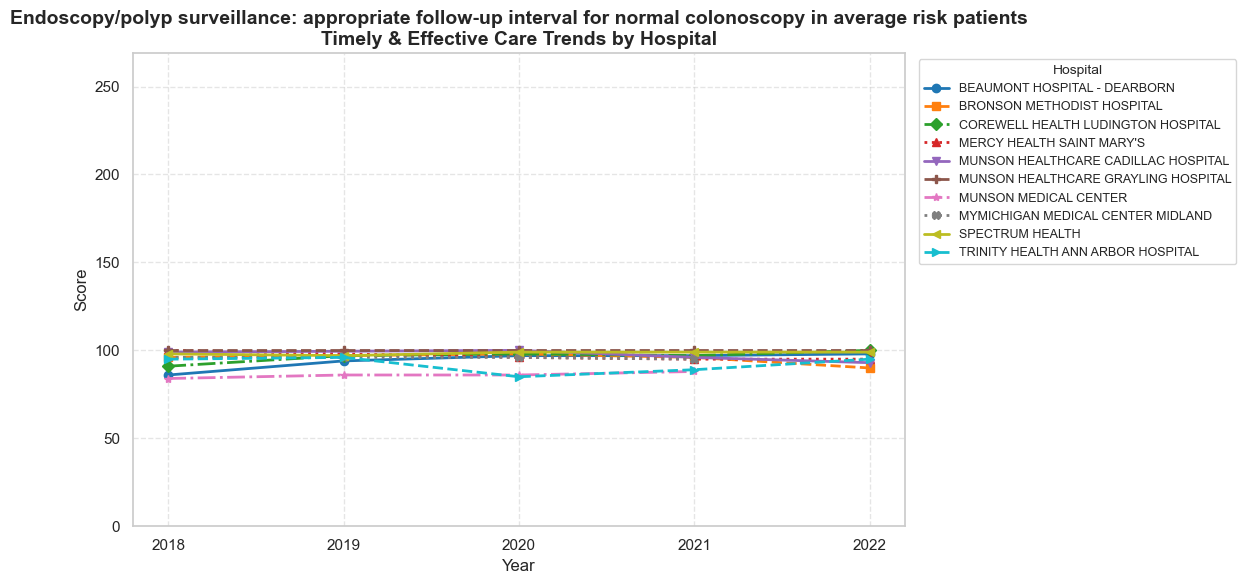

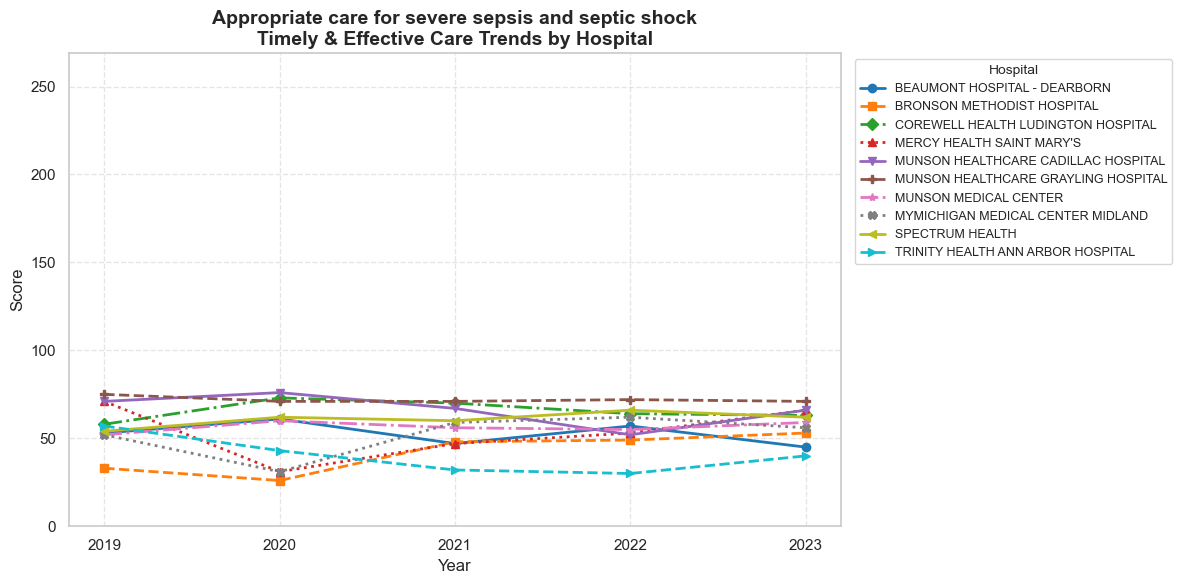

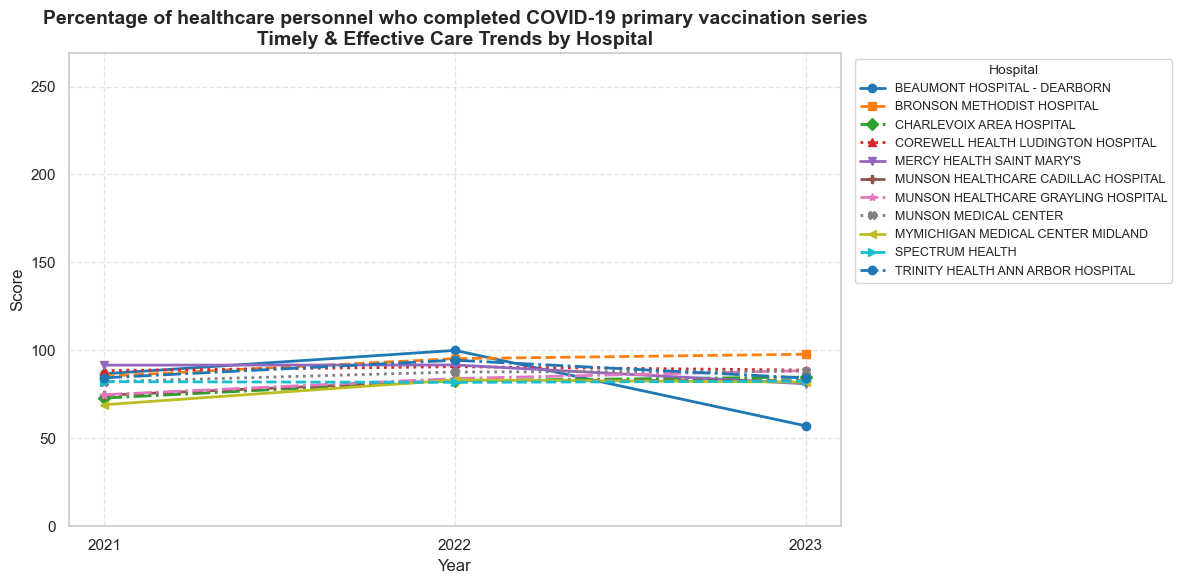

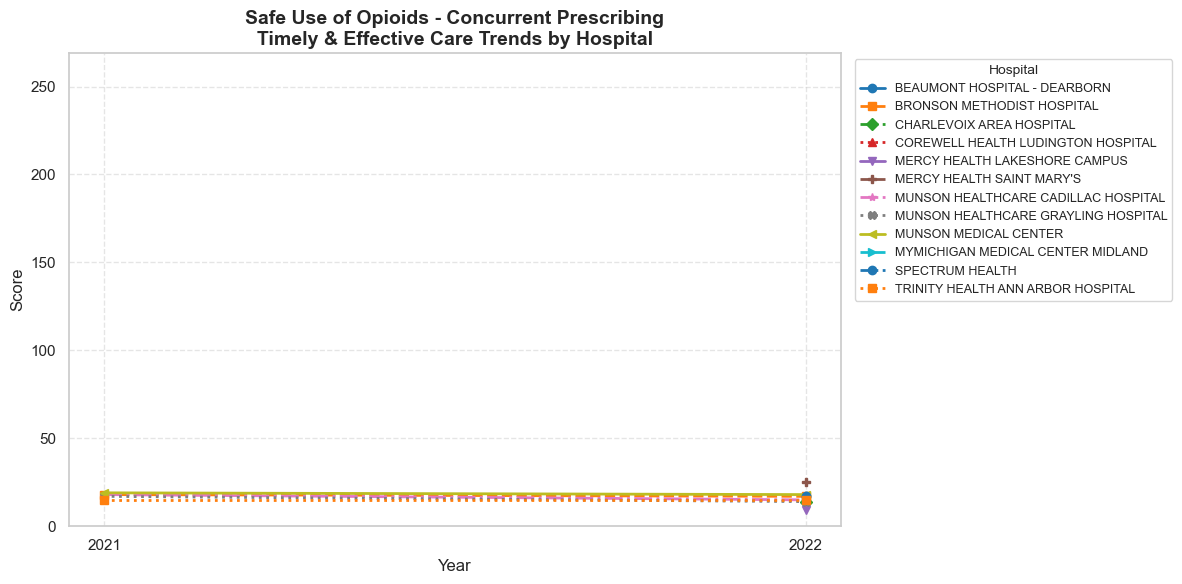

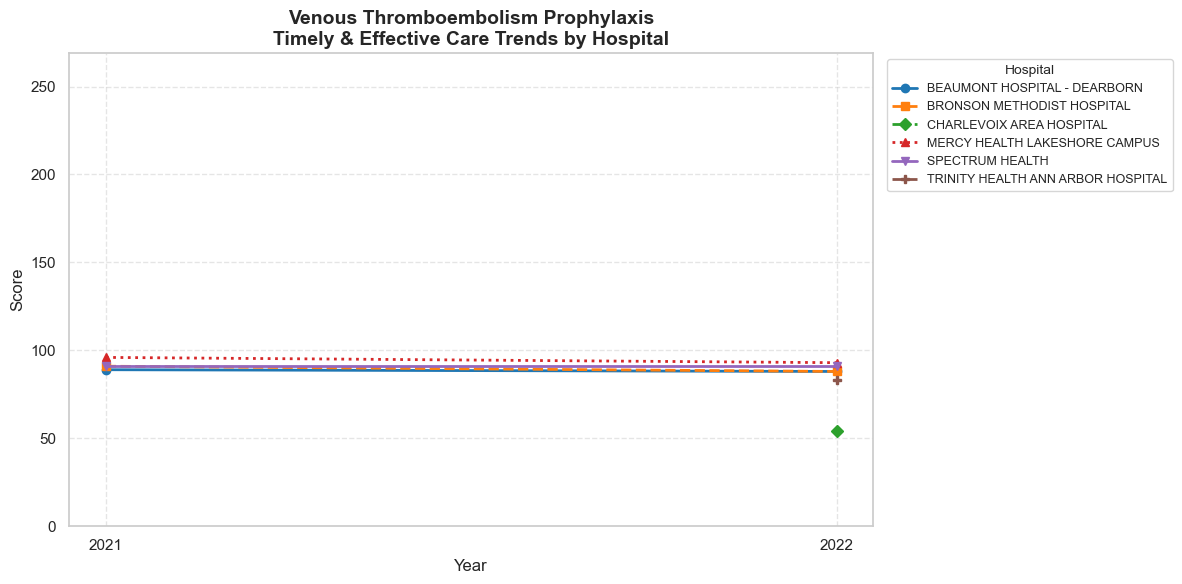

In [18]:


# -----------------------------
# STEP 1: Load and Combine Files
# -----------------------------
Care_1 = pd.read_csv("Timely and Effective Care - Hospital2020.csv")
Care_2 = pd.read_csv("Timely_and_Effective_Care-Hospital2021.csv")
Care_3 = pd.read_csv("Timely_and_Effective_Care-Hospital2022.csv")
Care_4 = pd.read_csv("Timely_and_Effective_Care-Hospital2023.csv")
Care_5 = pd.read_csv("Timely_and_Effective_Care-Hospital2024.csv")

Care_df = pd.concat([Care_1, Care_2, Care_3, Care_4, Care_5], ignore_index=True)

# -----------------------------
# STEP 2: Normalize Hospital Names Using 2024 Data
# -----------------------------
hospital_name_map = Care_5[['Facility ID', 'Facility Name']].drop_duplicates()
hospital_name_map['Facility ID'] = pd.to_numeric(hospital_name_map['Facility ID'], errors='coerce').astype('Int64')

Care_df['Facility ID'] = pd.to_numeric(Care_df['Facility ID'], errors='coerce').astype('Int64')
Care_df['Score'] = pd.to_numeric(Care_df['Score'], errors='coerce')

Care_df = Care_df.merge(hospital_name_map, on='Facility ID', how='left', suffixes=('', '_2024'))
Care_df['Facility Name'] = Care_df['Facility Name_2024']
Care_df.drop(columns=['Facility Name_2024'], inplace=True)

# -----------------------------
# STEP 3: Filter Hospitals and Measures
# -----------------------------
hospital_ids = [230017, 230020, 230038, 230058, 230081, 230097, 230110, 230156,
                230222, 231320, 233300, 230059, 231322]

target_measures = [
    "Percentage of healthcare personnel who completed COVID-19 primary vaccination series",
    "Healthcare workers given influenza vaccination", 
    "Average (median) time patients spent in the emergency department before leaving from the visit A lower number of minutes is better",
    "Appropriate care for severe sepsis and septic shock", 
    "Improvement in Patient's Visual Function within 90 Days Following Cataract Surgery", 
    "Endoscopy/polyp surveillance: appropriate follow-up interval for normal colonoscopy in average risk patients", 
    "Safe Use of Opioids - Concurrent Prescribing", 
    "Anticoagulation Therapy for Atrial Fibrillation/Flutter", 
    "Venous Thromboembolism Prophylaxis"
]

Care_df = Care_df[Care_df['Facility ID'].isin(hospital_ids)]
Care_df = Care_df[Care_df['Measure Name'].isin(target_measures)].copy()

# -----------------------------
# STEP 4: Extract Year and Clean
# -----------------------------
Care_df['Year'] = pd.to_datetime(Care_df['End Date'], errors='coerce').dt.year
Care_df = Care_df.dropna(subset=['Score', 'Year'])

# -----------------------------
# STEP 5: Plot - One Chart per Measure
# -----------------------------
sns.set(style="whitegrid")
custom_palette = sns.color_palette("tab10", n_colors=15)
global_ymin = 0
global_ymax = max(2.0, Care_df["Score"].max())

markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', '<', '>']
line_styles = ['-', '--', '-.', ':']

for measure in Care_df['Measure Name'].unique():
    plt.figure(figsize=(12, 6))
    data = Care_df[Care_df['Measure Name'] == measure].sort_values(['Facility Name', 'Year'])

    hospitals = data['Facility Name'].unique()
    style_map = {
        name: (custom_palette[i % len(custom_palette)],
               markers[i % len(markers)],
               line_styles[i % len(line_styles)])
        for i, name in enumerate(hospitals)
    }

    # Plot each hospital manually
    for hospital in hospitals:
        subset = data[data['Facility Name'] == hospital]
        color, marker, style = style_map[hospital]

        plt.plot(subset['Year'], subset['Score'],
                 label=hospital,
                 marker=marker,
                 linestyle=style,
                 linewidth=2,
                 color=color)

    # Title and axis formatting
    plt.title(f"{measure}\nTimely & Effective Care Trends by Hospital", fontsize=14, weight='bold')
    plt.ylabel("Score", fontsize=12)
    plt.xlabel("Year", fontsize=12)
    plt.ylim(global_ymin, global_ymax)
    plt.xticks(sorted(data['Year'].unique()))
    plt.grid(True, linestyle='--', alpha=0.5)

    # Hospital legend
    plt.legend(title="Hospital", bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=9, title_fontsize=10)

    # Save and show
    plt.tight_layout()
    safe_name = measure[:40].replace(" ", "_").replace("/", "_")
    plt.savefig(f"{safe_name}_Timely_Care_by_Hospital.png", dpi=300, bbox_inches='tight')
    plt.show()


Summary: Least number of hospital staffs are vaccinated by influenza vaccince in Mercy Health Saint Mary’s

On average the time spend by patient in emergency department is higher in Munson Medical Center followed by Trinity Health Ann Arbor Hospital
